In [1]:
from scipy import signal

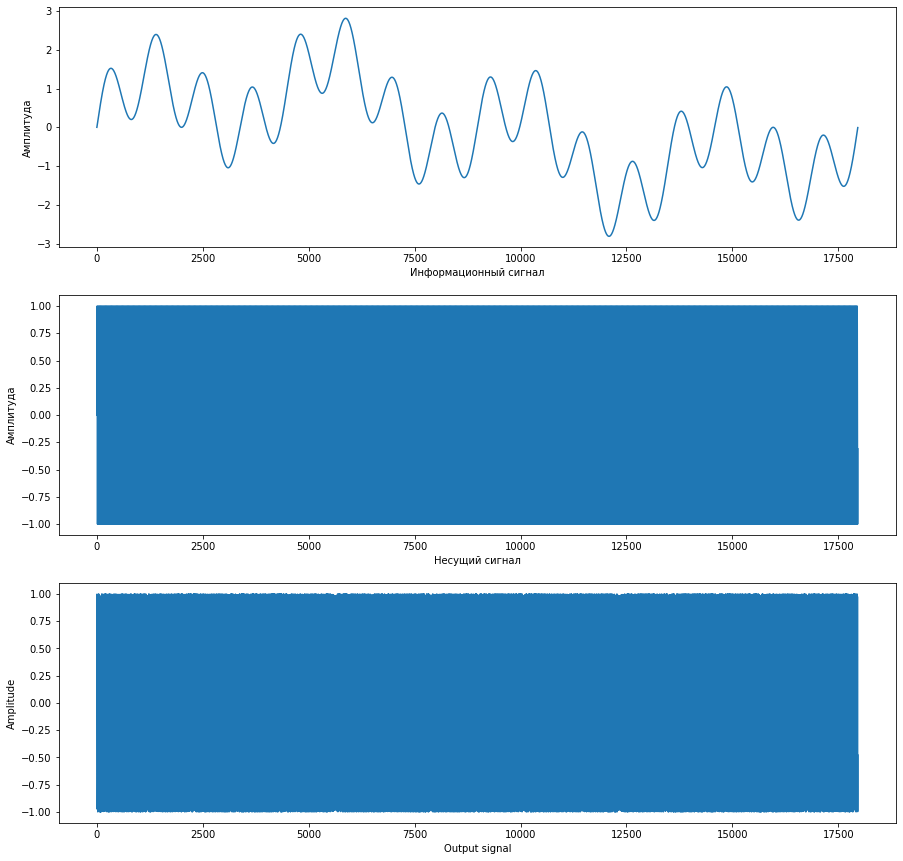

In [496]:
import sys
from random import random
sys.path.append('../')
from moed.analysis import Analysis
from moed.model import Sequence
from moed.proc import Proc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

modulator_frequency = 4.0
carrier_frequency = 90 * 10^6
modulation_index = 4

time = np.arange(carrier_frequency * 20) / (carrier_frequency * 20)
modulator = np.sin(2.0 * np.pi * modulator_frequency * time) + \
            np.sin(1.0 * np.pi * modulator_frequency / 2 * time) + \
            np.sin(4.0 * np.pi * modulator_frequency * 2 * time)
carrier = np.sin(2.0 * np.pi * carrier_frequency * time)
product = np.zeros_like(modulator)

for i, t in enumerate(time):
    product[i] = np.sin(2. * np.pi * (carrier_frequency * t + modulator[i] * modulation_index))

plt.figure(figsize=(15, 15))
plt.subplot(3, 1, 1)
plt.plot(modulator)
plt.ylabel('Амплитуда')
plt.xlabel('Информационный сигнал')
plt.subplot(3, 1, 2)
plt.plot(carrier)
plt.ylabel('Амплитуда')
plt.xlabel('Несущий сигнал')
plt.subplot(3, 1, 3)
plt.plot(product)
plt.ylabel('Amplitude')
plt.xlabel('Output signal')
plt.show()

In [497]:
s = signal.hilbert(product)

In [498]:
def discrim(x):
    X=np.real(x) # X is the real part of the received signal
    Y=np.imag(x) # Y is the imaginary part of the received signal
    b=np.array([1, -1]) # filter coefficients for discrete derivative
    a=np.array([1, 0]) # filter coefficients for discrete derivative
    derY=signal.lfilter(b,a,Y) # derivative of Y,
    derX=signal.lfilter(b,a,X) # " X,
    disdata=((X*derY-Y*derX)/(X**2+Y**2))
    return disdata

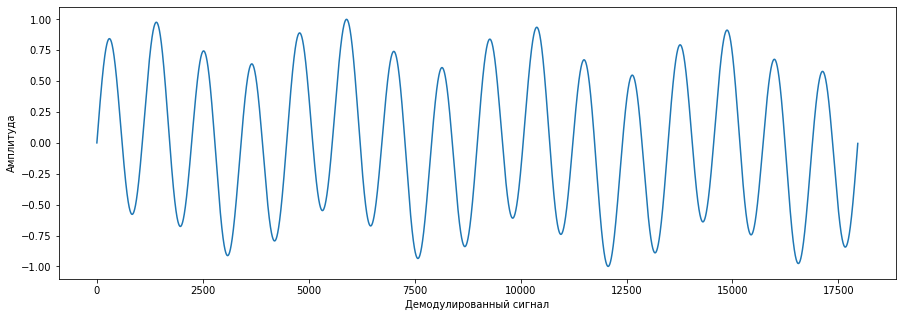

In [499]:
demod = discrim(s)
demod0 = np.imag(signal.hilbert(demod[1:]))
plt.figure(figsize=(15, 5))
plt.plot(demod0*(1/max(demod0)))
plt.ylabel('Амплитуда')
plt.xlabel('Демодулированный сигнал')
plt.show()

In [500]:
import math

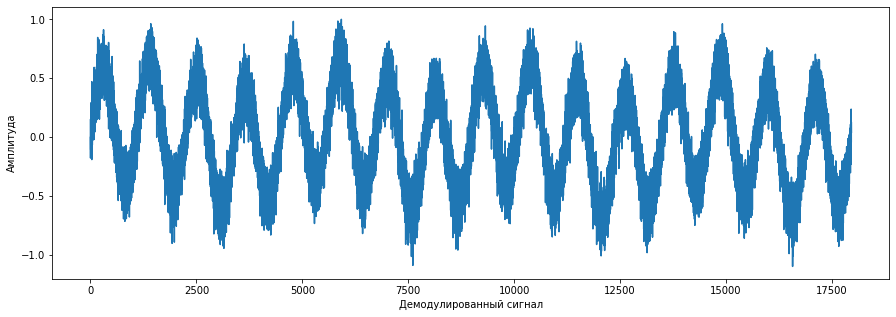

0.23089611731350757

In [501]:
noised = product + (np.random.random((len(product))) * 0.1 - 0.05)
n = signal.hilbert(noised)
demod01 = discrim(n)
demod01 = np.imag(signal.hilbert(demod01[1:]))
plt.figure(figsize=(15, 5))
plt.plot(demod01*(1/max(demod01)))
plt.ylabel('Амплитуда')
plt.xlabel('Демодулированный сигнал')
plt.show()
rmse(demod0*(1/max(demod0)), demod01*(1/max(demod01)))

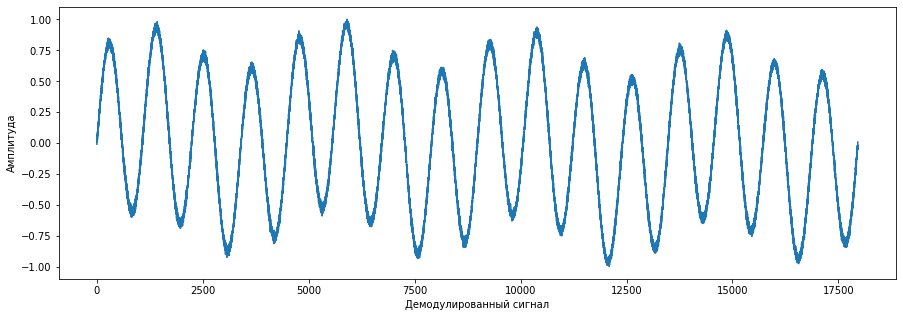

0.0325949902995671

In [502]:
noised = product + (np.random.random((len(product))) * 0.01 - 0.005)
n = signal.hilbert(noised)
demod001 = discrim(n)
demod001 = np.imag(signal.hilbert(demod001[1:]))
plt.figure(figsize=(15, 5))
plt.plot(demod001*(1/max(demod001)))
plt.ylabel('Амплитуда')
plt.xlabel('Демодулированный сигнал')
plt.show()
rmse(demod0*(1/max(demod0)), demod001*(1/max(demod001)))

0.002724954174759345

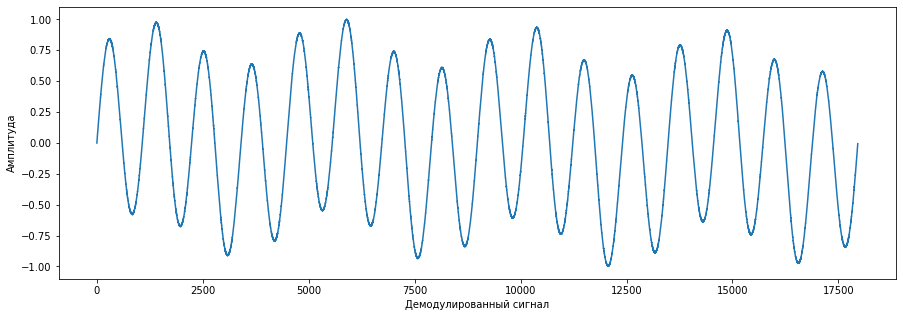

In [503]:
noised = product + (np.random.random((len(product))) * 0.001 - 0.0005)
n = signal.hilbert(noised)
demod0001 = discrim(n)
demod0001 = np.imag(signal.hilbert(demod0001[1:]))
plt.figure(figsize=(15, 5))
plt.plot(demod0001*(1/max(demod0001)))
plt.ylabel('Амплитуда')
plt.xlabel('Демодулированный сигнал')
plt.show
rmse(demod0*(1/max(demod0)), demod0001*(1/max(demod0001)))

In [504]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [495]:
from statistics import variance